In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
# basketball_stat.csv 파일의 데이터를 데이터프레임으로 읽어온다.
df = pd.read_csv('./data/basketball_stat.csv')
df.head()

,Player,Pos,3P,2P,TRB,AST,STL,BLK
0,Alex Abrines,SG,1.4,0.6,1.3,0.6,0.5,0.1
1,Steven Adams,C,0.0,4.7,7.7,1.1,1.1,1.0
2,Alexis Ajinca,C,0.0,2.3,4.5,0.3,0.5,0.6
3,Chris Andersen,C,0.0,0.8,2.6,0.4,0.4,0.6
4,Will Barton,SG,1.5,3.5,4.3,3.4,0.8,0.5


In [3]:
df.Pos.value_counts()

SG    50
C     50
Name: Pos, dtype: int64

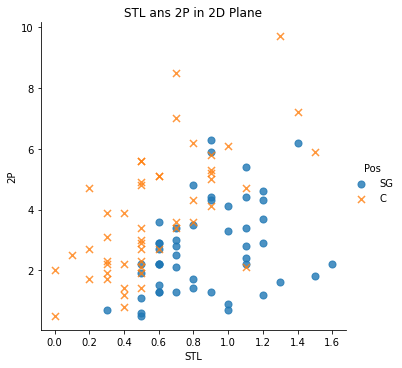

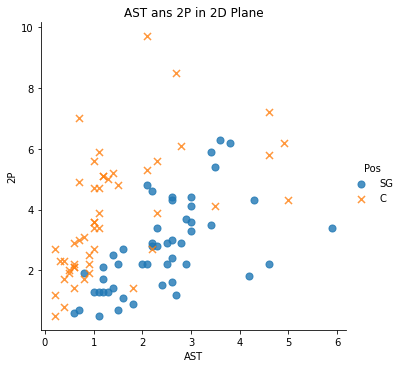

In [4]:
# seaborn 라이브러리의 lmplot() 함수로 스틸과 2점슛, 어시스트와 2점슛의 포지션(Pos) 별 분포도를 출력한다.
sns.lmplot(data=df, x='STL', y='2P', fit_reg=False, # 데이터, x축, y축, 회귀선 표시 여부
          hue='Pos',                                # 그래프에 표시될 표식의 색상
          scatter_kws={'s': 50},                    # 그래프에 표시될 표식의 크기
          markers=['o', 'x'])                       # hue에 따른 표식의 종류
plt.title('STL ans 2P in 2D Plane')
sns.lmplot(data=df, x='AST', y='2P', fit_reg=False, hue='Pos', scatter_kws={'s': 50}, markers=['o', 'x']) 
plt.title('AST ans 2P in 2D Plane')
plt.show()

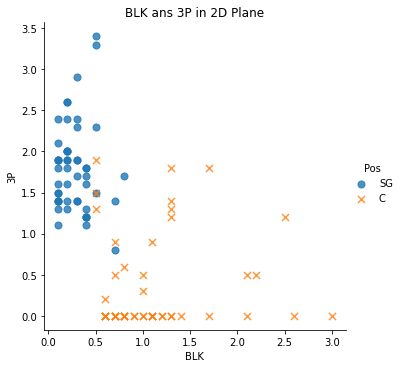

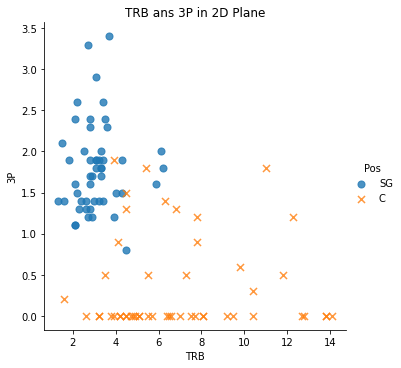

In [5]:
# seaborn 라이브러리의 lmplot() 함수로 블로킹과 3점슛, 리바운드와 3점슛의 포지션(Pos) 별 분포도를 출력한다.
sns.lmplot(data=df, x='BLK', y='3P', fit_reg=False, hue='Pos', scatter_kws={'s': 50}, markers=['o', 'x']) 
plt.title('BLK ans 3P in 2D Plane')
sns.lmplot(data=df, x='TRB', y='3P', fit_reg=False, hue='Pos', scatter_kws={'s': 50}, markers=['o', 'x']) 
plt.title('TRB ans 3P in 2D Plane')
plt.show()

데이터 전처리

In [6]:
# drop() 함수로 불필요한 컬럼을 삭제한다.
# axis 속성은 생략시 0이 기본값이며 행을 삭제하고 1을 쓰면 열을 삭제한다.
# inplace 속성은 False가 기본값이며 함수가 실행된 결과를 데이터에 반영하지 않고 True를 쓰면 실행된 결과를 데이터에 반영한다.
# df = df.drop(['2P', 'AST', 'STL'], axis=1)
df.drop(['2P', 'AST', 'STL'], axis=1, inplace=True)

In [7]:
df.head()

,Player,Pos,3P,TRB,BLK
0,Alex Abrines,SG,1.4,1.3,0.1
1,Steven Adams,C,0.0,7.7,1.0
2,Alexis Ajinca,C,0.0,4.5,0.6
3,Chris Andersen,C,0.0,2.6,0.6
4,Will Barton,SG,1.5,4.3,0.5


전체 데이터를 무작위로 학습 데이터와 테스트 데이터로 분리한다.

In [8]:
# 학습 데이터와 테스트 데이터로 데이터를 분리하기 위해 sklearn 패키지의 train_test_split() 함수를 import 한다.
from sklearn.model_selection import train_test_split
# 전체 데이터의 80%를 학습용 데이터로 전체 데이터의 20%를 테스트 데이터로 무작위로 분리한다.
train, test = train_test_split(df, train_size=0.8, test_size=0.2)
print(train.shape[0])
print(test.shape[0])

80
20


최적의 kNN 파리미터 찾기

In [9]:
# sklearn의 cross_val_score() 함수의 k-fold 교차 검증을 사용해서 kNN 알고리즘의 조절 가능한 단 하나의 변수 k를 찾는다.
# k-fold 교차 검증은 기존 데이터를 k개로 나눠서 k번 정확도를 검증하는 방법이다.
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

In [10]:
# 최적의 k를 찾기 위해서 교차 검증을 수행할 k의 범위를 3부터 학습 데이터 개수의 절반까지 지정한다.
k_list = []
for i in range(3, train.shape[0] // 2, 2):
    k_list.append(i)
print(k_list)

[3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39]


In [11]:
# 각각의 k별 10-fold 교차 검증 결과의 평균을 기억할 빈 리스트를 선언한다.
cross_validation_scores = []
# 학습 데이터에서 학습에 사용할 데이터를 저장한다.
x_train = train[['3P', 'TRB', 'BLK']]
# 학습 데이터에서 학습 결과로 사용할 데이터를 저장한다.
y_train = train[['Pos']] # 실제값

학습 데이터를 10조각으로 나눠 1조각을 검증 데이터로 사용하고 나머지 9조각을 학습 데이터로 사용해서 1번째 조각부터 10번째 조각까지 1번씩 검증하고 10번 검증 결과를 10으로 나눈 평균을 검증 결과의 점수로 한다.
***
cross_val_score(model, X, Y, scoring=None, cv=None)  
model: 분석 모델  
X: 독립 변수 데이터, 학습 데이터  
Y: 종속 변수 데이터, 학습 결과, 학습에 따른 결과는 1차원 형태로 지정해야 한다.  
scoring=None: 성능 검증에 사용할 매개 변수에 원하는 평가 지표를 지정한다. => 정확도를 의미하는 'accuracy'를 입력한다.  
cv=None: 교차 검증 생성기 객체 또는 숫자, None일 경우 KFold(3), 숫자를 지정하면 KFold(숫자)

In [12]:
# 10-fold 교차 검증을 각 k를 대상으로 수행해 검증 결과를 저장한다.
for k in k_list:
    # KNeighborsClassifier() 함수의 n_neighbors 속성에 kNN 모델에서 사용할 이웃의 개수를 지정해 kNN 모델을 만든다.
    knn = KNeighborsClassifier(n_neighbors=k)
    # 학습에 따른 결과는 1차원 형태로 지정해야 하므로 학습 결과에 values.ravel()를 사용해서 2차원을 1차원으로 변경해야 한다.
    scores = cross_val_score(knn, x_train, y_train.values.ravel())
    cross_validation_scores.append(scores.mean())
print(cross_validation_scores)

[0.8875, 0.8625, 0.875, 0.9125, 0.9, 0.9, 0.875, 0.875, 0.8875, 0.875, 0.875, 0.8625, 0.8625, 0.85, 0.85, 0.8375, 0.8375, 0.825, 0.8125]


각 k별로 출력된 정확도가 쉽게 이해되지 않기 때문에 시각화를 해서 최적의 k를 확인한다.

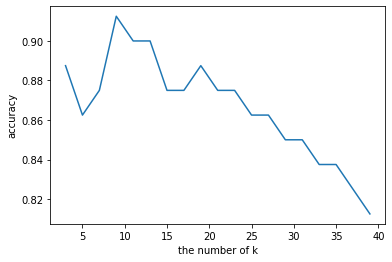

In [13]:
plt.plot(k_list, cross_validation_scores)
plt.xlabel('the number of k')
plt.ylabel('accuracy')
plt.show()

In [14]:
# 예측율이 가장 높은 k를 선정한다.
optimal_k = k_list[cross_validation_scores.index(max(cross_validation_scores))]
print('최적의 k: {}'.format(optimal_k))

최적의 k: 9


모델 테스트

In [15]:
from sklearn.metrics import accuracy_score

In [16]:
# 분별력이 있다고 판단된 3점슛(3P), 블로킹(BLK), 리바운드(TRB) 속성으로 모듈을 학습한 후 테스트를 진행한다.
knn = KNeighborsClassifier(n_neighbors=optimal_k)
# 학습에 사용할 속성과 예측값을 지정한다.
x_train = train[['3P', 'TRB', 'BLK']]
y_train = train[['Pos']]
knn.fit(x_train, y_train.values.ravel())

# 테스트에 사용할 속성과 포지션에 대한 정답을 지정한다.
x_test = test[['3P', 'TRB', 'BLK']]
y_test = test[['Pos']]

# 테스트를 수행한다. 정확도를 계산한다.
predict = knn.predict(x_test) # 예측값
# 모델 예측 정확도를 계산한다.
print('정확도: {}'.format(accuracy_score(y_test.values.ravel(), predict)))

정확도: 0.9


In [17]:
comparison = pd.DataFrame({'실제값': y_test.values.ravel(), '예측값': predict})
comparison

,실제값,예측값
0,SG,SG
1,SG,SG
2,SG,SG
3,SG,SG
4,SG,SG
5,C,C
6,C,C
7,SG,SG
8,SG,SG
9,SG,SG


샘플 테스트

In [21]:
x = {'3P': [0, 3.9], 'BLK': [7.7, 0.3], 'TRB': [1.0, 0.1]}
x_test = pd.DataFrame(x)
print(x_test)
y = {'Pos': ['C', 'SG']}
y_test = pd.DataFrame(y)
print(y_test)

predict = knn.predict(x_test)
print('샘플 테스트 정확도: {}'.format(accuracy_score(y_test.values.ravel(), predict)))
comparison = pd.DataFrame({'실제값': y_test.values.ravel(), '예측값': predict})
comparison

    3P  BLK  TRB
0  0.0  7.7  1.0
1  3.9  0.3  0.1
  Pos
0   C
1  SG
샘플 테스트 정확도: 1.0


,실제값,예측값
0,C,C
1,SG,SG
